In [67]:
import numpy as np
from scipy.optimize import least_squares,rosen, differential_evolution
import pandas as pd
from math import *
import matplotlib.pyplot as plt

Problem 1

In [2]:
data=pd.read_csv('Assignment1_data.csv',header=None,names=['T','value'])

In [3]:
def g(x):
    T=data['T']
    v=data['value']
    res=np.zeros(len(T))
    res=x[0]+x[1]*np.exp(x[2]*T)+x[3]*np.exp(x[4]*T)-v
    return res

In [4]:
x_ini=np.zeros(5)
res_1 = least_squares(g, x_ini,method='lm')
res_1.x

F:\ananconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


array([ 7.13362248e+01, -1.95655405e+00, -3.32416549e-01, -6.87208757e+01,
        2.24525249e-03])

Problem 2

In [5]:
def rosen_der(x):
    return np.array([2*(x[0]-1)-400*(x[1]-x[0]**2)*x[0],200*(x[1]-x[0]**2)])

def rosenberg(x):
    return (x[0]-1)**2+100*(x[1]-x[0]**2)**2
def rosenberg_opt(x,alpha,tol1=1e-12,tol2=1e-6):
    it=0
    while True:
        it+=1
        crosen=rosenberg(x)
        der=rosen_der(x)
        ba=alpha[0]
        cmin=rosenberg(x-der*ba)
        for i in range(1,len(alpha)):
            val=rosenberg(x-der*alpha[i])
            if val<cmin:
                ba=alpha[i]
                cmin=val
        x=x-der*ba
        if abs(der).all()<tol1 and abs(cmin-crosen)<tol2:
            return x,cmin,'tol exit'
        elif it>10000:
            return x,cmin,'iter exit'

In [20]:
alpha=[0.001,0.002,0.003,0.004,0.005,0.1,0.5]

In [21]:
rosenberg_opt(np.array([0.,0.]),alpha)

(array([1., 1.]), 3.1049022887626685e-26, 'tol exit')

In [26]:
xcov=[]
ycov=[]
xexp=[]
yexp=[]
for i in range(25):
    for j in range(25):
        x=-3+0.3*i
        y=-3+0.3*j
        array,val,result=rosenberg_opt(np.array([x,y]),alpha)
        if result=='tol exit':
            xcov.append(x)
            ycov.append(y)
        elif result=='iter exit':
            xexp.append(x)
            yexp.append(y)
            

F:\ananconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
F:\ananconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
F:\ananconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
F:\ananconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
F:\ananconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]
F:\ananconda\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app
F:\ananconda\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in subtract


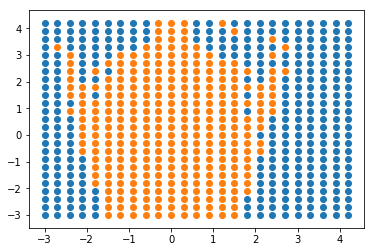

In [68]:
plt.scatter(xexp,yexp)
plt.scatter(xcov,ycov)

Problem 3

In [40]:
def ackley(x):
    res=20+exp(1)-20*exp(-0.2*sqrt(0.5*(x[0]**2+x[1]**2)))-exp(0.5*(cos(2*pi*x[0])+cos(2*pi*x[1])))
    return res

In [45]:
bounds1 = [(-1,3)]*2

In [52]:
differential_evolution(rosenberg,bounds=bounds1,strategy='rand1bin',popsize=10)

     fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 4323
     nit: 215
 success: True
       x: array([1., 1.])

In [47]:
bounds2 = [(-3,3)]*2

In [49]:
differential_evolution(ackley,bounds=bounds2,strategy='rand1bin')

In [51]:
a['success']

True

In [53]:
Flist=[0.1+0.2*i for i in range(10)]
CRlist=[0.1*i for i in range(1,10)]
#rosen success x
rsx=[]
rsy=[]
#rosen unsuccess x
rux=[]
ruy=[]
asx=[]
asy=[]
aux=[]
auy=[]
for F in Flist:
    for CR in CRlist:
        rres=differential_evolution(rosenberg,bounds=bounds1,strategy='rand1bin',popsize=10,mutation=F,recombination=CR)
        ares=differential_evolution(ackley,bounds=bounds2,strategy='rand1bin',popsize=10,mutation=F,recombination=CR)
        if rres['success']:
            rsx.append(F)
            rsy.append(CR)
        else:
            rux.append(F)
            ruy.append(CR)
        if ares['success']:
            asx.append(F)
            asy.append(CR)
        else:
            aux.append(F)
            auy.append(CR)

Text(0,0.5,'CR')

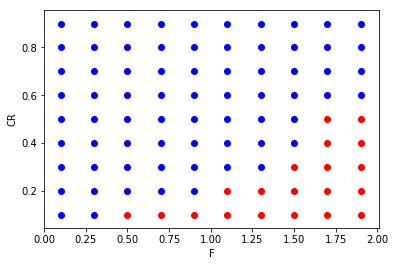

In [70]:
plt.scatter(rsx,rsy,c='b')
plt.scatter(rux,ruy,c='r')
plt.xlabel('F')
plt.ylabel('CR')

Text(0,0.5,'CR')

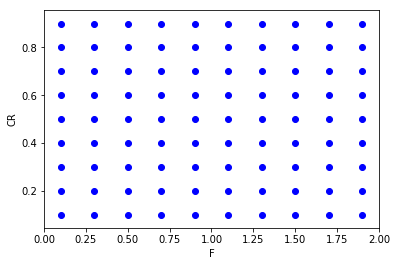

In [71]:
plt.scatter(asx,asy,c='b')
plt.scatter(aux,auy,c='r')
plt.xlabel('F')
plt.ylabel('CR')

In [63]:
#rosen success pop
rsp=[]
rup=[]
asp=[]
aup=[]
for n in range(4,22):
    rres=differential_evolution(rosenberg,bounds=bounds1,strategy='rand1bin',popsize=n,mutation=0.5,recombination=0.1)
    ares=differential_evolution(ackley,bounds=bounds2,strategy='rand1bin',popsize=n,mutation=0.5,recombination=0.1)
    if rres['success']:
            rsp.append(n)
    else:
            rup.append(n)
    if ares['success']:
            asp.append(n)
    else:
            aup.append(n)

F:\ananconda\lib\site-packages\scipy\optimize\_differentialevolution.py:485: RuntimeWarning: divide by zero encountered in double_scalars
  np.abs(np.mean(self.population_energies) + _MACHEPS))


In [64]:
rsp

[4, 5, 8]

In [65]:
asp

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]